<a href="https://colab.research.google.com/github/abidshafee/autoML-tsModel/blob/main/AutoML_ts_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install auto_ts
!pip install dask_xgboost
#!pip install desk

In order to use Dask's parallelized dataframes (built on top of pandas), you have to tell pip to install some "extras" ([reference ](https://packaging.python.org/installing/#installing-setuptools-extras)), as mentioned in the [Dask installation documentation](http://dask.pydata.org/en/latest/install.html#pip):

`pip install "dask[dataframe]"` Or `pip install "dask[complete]"`

In [ ]:
!pip install "dask[complete]" #sol to auto_ts import error

In [78]:
# import auto_ts as ts
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from datetime import datetime

In [79]:
# from google.colab import files
# uploaded = files.upload()

In [80]:
# df = pd.read_csv("throughput_metrics.csv", parse_dates=['Time'], index_col='Time')
df = pd.read_csv("https://raw.githubusercontent.com/abidshafee/autoML-tsModel/main/throughput_metrics.csv", parse_dates=['Time'], index_col='Time')

In [81]:
df.describe(include='all')

,SiteA,SiteB,SiteC,SiteD,SiteE,SiteF
count,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03,8.760000e+03
mean,1.134300e+10,1.050114e+10,2.422851e+07,7.645930e+07,8.169740e+07,1.194613e+06
std,5.843792e+09,8.509006e+09,3.285736e+07,6.293577e+07,1.297177e+08,8.569518e+05
min,3.227624e+08,0.000000e+00,1.013134e+04,7.408801e+05,0.000000e+00,3.786450e+05
25%,7.677623e+09,3.942119e+09,4.546207e+04,2.792179e+07,1.817469e+07,8.628346e+05
50%,1.002482e+10,8.836137e+09,8.613927e+04,5.725981e+07,5.025162e+07,9.951363e+05
75%,1.335055e+10,1.452307e+10,4.363564e+07,1.097949e+08,9.435435e+07,1.243718e+06
max,7.553718e+10,5.229297e+10,2.513275e+08,3.593521e+08,1.578908e+09,2.659389e+07


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8760 entries, 2018-01-01 08:00:00 to 2019-01-01 07:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SiteA   8760 non-null   float64
 1   SiteB   8760 non-null   float64
 2   SiteC   8760 non-null   float64
 3   SiteD   8760 non-null   float64
 4   SiteE   8760 non-null   float64
 5   SiteF   8760 non-null   float64
dtypes: float64(6)
memory usage: 479.1 KB


In [83]:
df.isna().any()

SiteA    False
SiteB    False
SiteC    False
SiteD    False
SiteE    False
SiteF    False
dtype: bool

In [84]:
df.dropna() #incase any missing values in future data
df.head()

,SiteA,SiteB,SiteC,SiteD,SiteE,SiteF
Time,,,,,,
2018-01-01 08:00:00,1.411093e+10,1.109243e+09,8.289831e+07,56650005.21,1.117868e+07,827420.9772
2018-01-01 09:00:00,1.345362e+10,1.242256e+09,4.375739e+04,49307351.26,7.070847e+06,913017.6007
2018-01-01 10:00:00,1.216888e+10,2.006322e+09,4.315725e+04,56843652.59,5.132826e+07,874471.3644
2018-01-01 11:00:00,1.123120e+10,1.073181e+09,8.277154e+07,46645240.59,5.217827e+06,837246.7783
2018-01-01 12:00:00,1.078085e+10,8.645069e+08,3.343548e+04,30966947.37,7.495363e+06,827143.7497


In [85]:
SiteA = df[[df.columns[0]]]
SiteA

,SiteA
Time,
2018-01-01 08:00:00,1.411093e+10
2018-01-01 09:00:00,1.345362e+10
2018-01-01 10:00:00,1.216888e+10
2018-01-01 11:00:00,1.123120e+10
2018-01-01 12:00:00,1.078085e+10
...,...
2019-01-01 03:00:00,4.031000e+09
2019-01-01 04:00:00,8.101920e+09
2019-01-01 05:00:00,7.529417e+09


In [130]:
mpl.rcParams['figure.figsize'] = (13, 6)

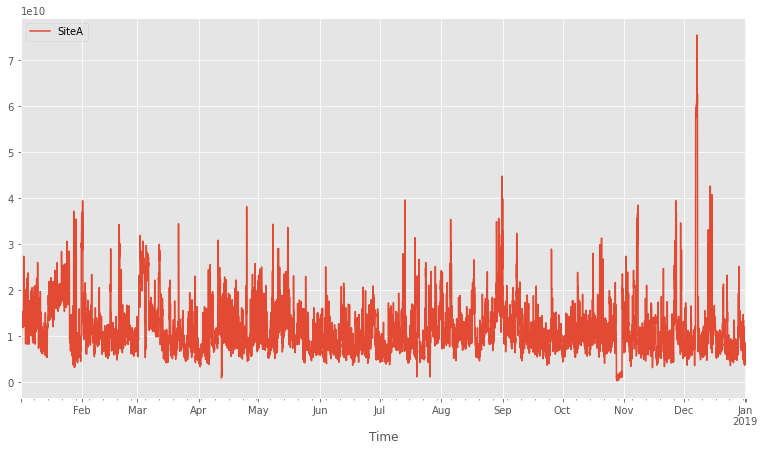

In [87]:
SiteA.plot()

In [88]:
SiteB = df[[df.columns[1]]]
SiteB

,SiteB
Time,
2018-01-01 08:00:00,1.109243e+09
2018-01-01 09:00:00,1.242256e+09
2018-01-01 10:00:00,2.006322e+09
2018-01-01 11:00:00,1.073181e+09
2018-01-01 12:00:00,8.645069e+08
...,...
2019-01-01 03:00:00,8.216592e+09
2019-01-01 04:00:00,8.529913e+09
2019-01-01 05:00:00,8.250299e+09


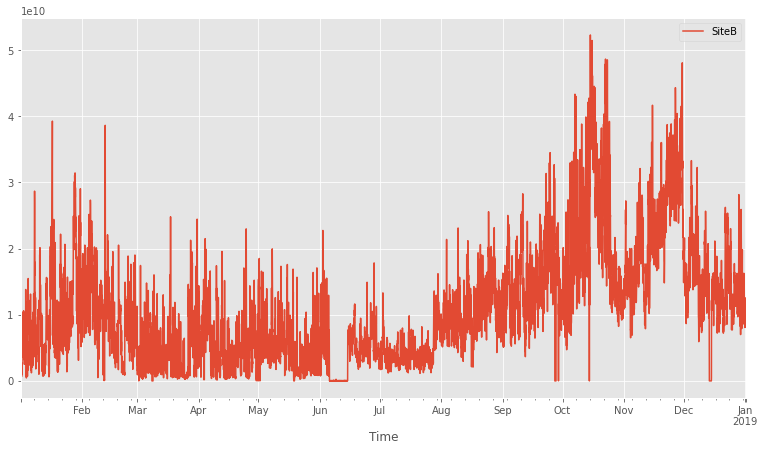

In [89]:
SiteB.plot()

In [90]:
SiteC = df[[df.columns[2]]]
SiteC

,SiteC
Time,
2018-01-01 08:00:00,8.289831e+07
2018-01-01 09:00:00,4.375739e+04
2018-01-01 10:00:00,4.315725e+04
2018-01-01 11:00:00,8.277154e+07
2018-01-01 12:00:00,3.343548e+04
...,...
2019-01-01 03:00:00,4.036552e+07
2019-01-01 04:00:00,4.194376e+07
2019-01-01 05:00:00,4.499228e+04


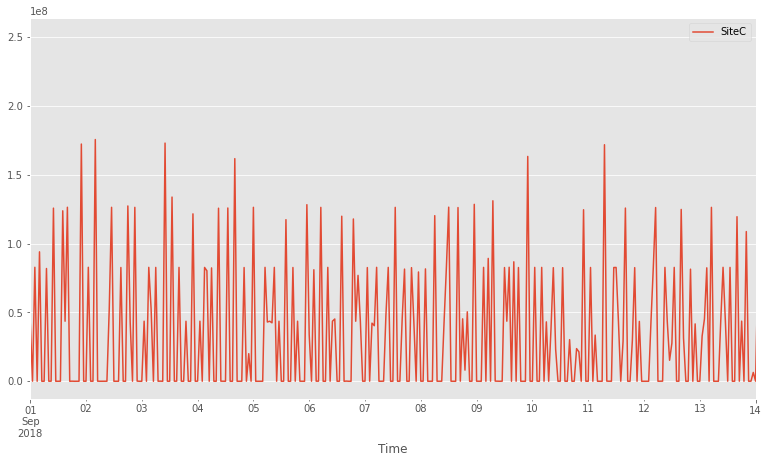

In [91]:
SiteC.plot(xlim=['2018-9-1', '2018-9-14'])

In [92]:
Apr_df = df.loc['2018-4']

In [93]:
SiteA_apr = Apr_df[[Apr_df.columns[0]]]

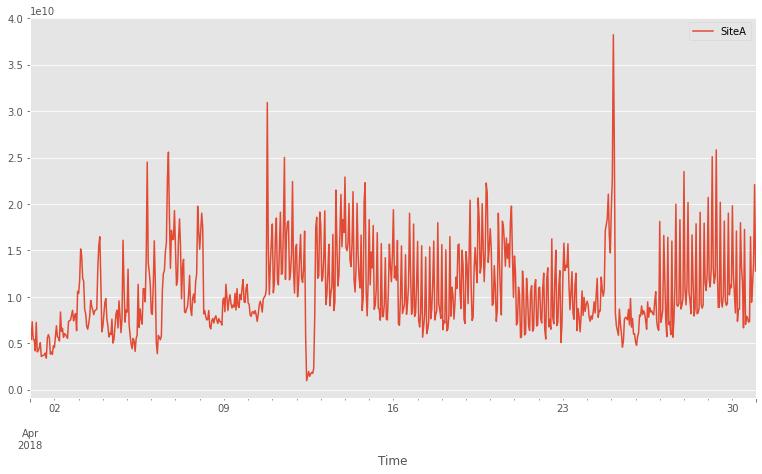

In [94]:
SiteA_apr.plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f8d23e92990>,
      dtype=object)

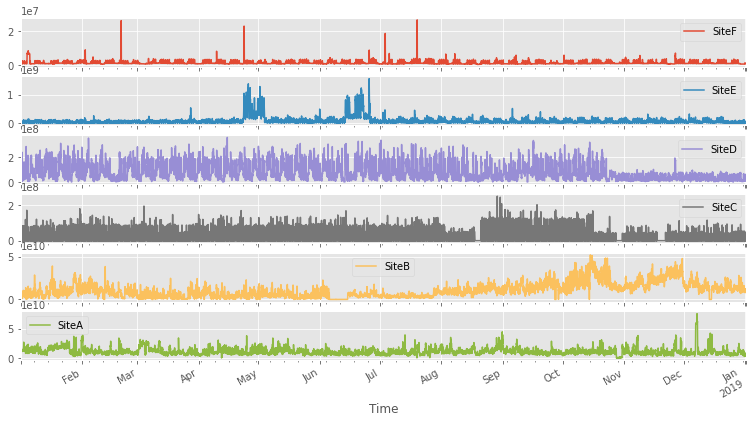

In [95]:
# Plotting all features together
df[['SiteF','SiteE','SiteD','SiteC','SiteB','SiteA']].plot(subplots=True)

In [96]:
df.columns[0]

'SiteA'

In [97]:
df[['SiteA', 'SiteB','SiteC']].values

array([[1.41109302e+10, 1.10924270e+09, 8.28983053e+07],
       [1.34536193e+10, 1.24225568e+09, 4.37573904e+04],
       [1.21688799e+10, 2.00632182e+09, 4.31572535e+04],
       ...,
       [7.52941681e+09, 8.25029932e+09, 4.49922778e+04],
       [6.88469466e+09, 9.62731719e+09, 7.31901028e+04],
       [8.67557506e+09, 1.22801190e+10, 7.31901028e+04]])

In [98]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [100]:
scaler = StandardScaler()
tdf = scaler.fit_transform(df)
tdf[0]

In [103]:
from sklearn.preprocessing import MinMaxScaler
MMX = MinMaxScaler()
mxdf = MMX.fit_transform(df)

In [106]:
np.array(tdf[0])

array([ 0.47368079, -1.10382285,  1.78569239, -0.31477219, -0.5436633 ,
       -0.42851037])

In [107]:
for i, col in enumerate(df.columns[0:]):
  print(df.columns[i])

SiteA
SiteB
SiteC
SiteD
SiteE
SiteF


In [109]:
# testing if ts data is statinary using null hypthesis
from statsmodels.tsa.stattools import adfuller as adf

In [110]:
result = adf(df['SiteA'])

In [114]:
p = result[1]
p

1.167181601915423e-19

p value is quite high above 0.5, therefore we can infer that the ts data is not stationary. So we need to make it stationary in order to feed the data into ARIMA model

In [116]:
adf_stat = result[0]
adf_stat

-10.899781906660904

In [118]:
# we'll plot acf plot to determine order of differenciation for removing auto correlation
from statsmodels.graphics.tsaplots import plot_acf

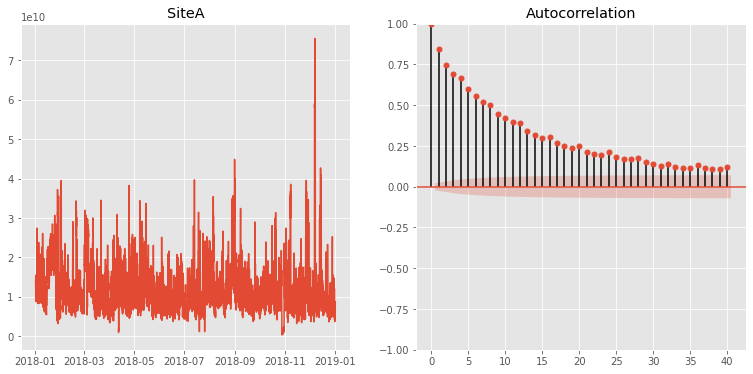

In [133]:
fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(df['SiteA'])
ax1.set_title('SiteA')

plot_acf(df['SiteA'], ax=ax2);

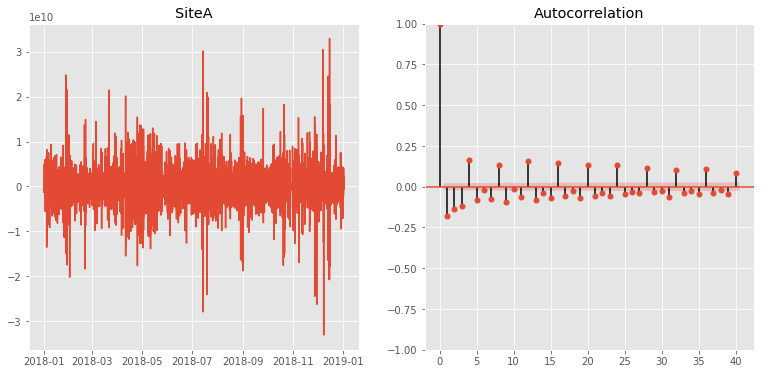

In [132]:
# now lets start differentiating tsdata to reduce or remove autocorrelation
siteA_df = df['SiteA'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(siteA_df)
ax1.set_title('SiteA')

plot_acf(siteA_df, ax=ax2);

In [128]:
# now we can see our tsdata is randomly distfributed around 0 mean
# let's differentiate out siteA tsdata again to remove autocorrelation further

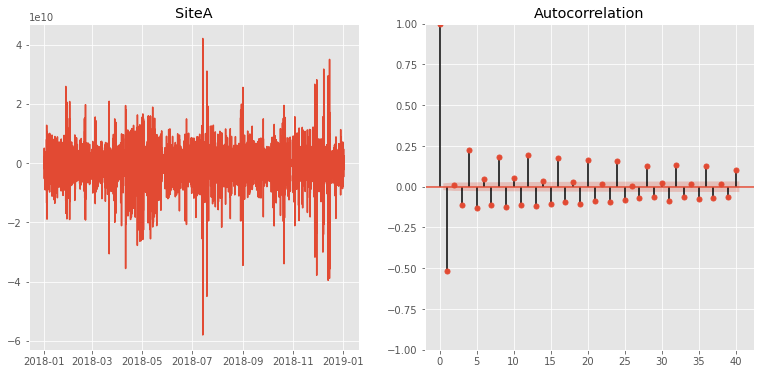

In [131]:
siteA_df2 = siteA_df.diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(siteA_df2)
ax1.set_title('SiteA')

plot_acf(siteA_df2, ax=ax2);

as we can see from auto correlation graph that second differentiation gives the lag further negative therefore we should chose the differebtiation order as 1.\ 
Although we can find our differentiatioon order using `pmdarima` `ndiffs` class

In [134]:
from pmdarima.arima.utils import ndiffs

In [135]:
ndiffs(df['SiteA'], test='adf')

0

here the `ndiffs` class indicates we don't need to differentiate our time series data. So it means we don't need to differentiate our ts data to make **stationary**.

### Determining P
p is the order of auto regressive terms. it refers to the number of lags to be used as predictors. We can determine p by inspacting partial autocorrelation (pacf) plot

In [136]:
from statsmodels.graphics.tsaplots import plot_pacf

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


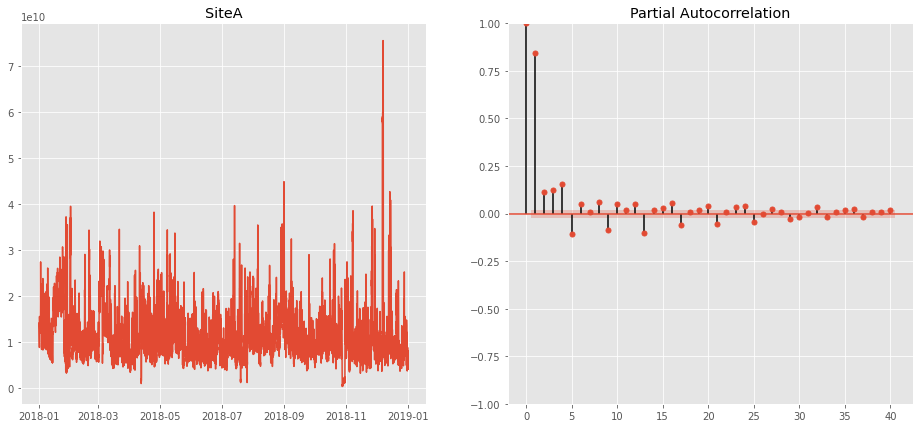

In [144]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16, 7))
ax1.plot(df['SiteA'])
ax1.set_title('SiteA')

plot_pacf(df['SiteA'], ax=ax2);

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


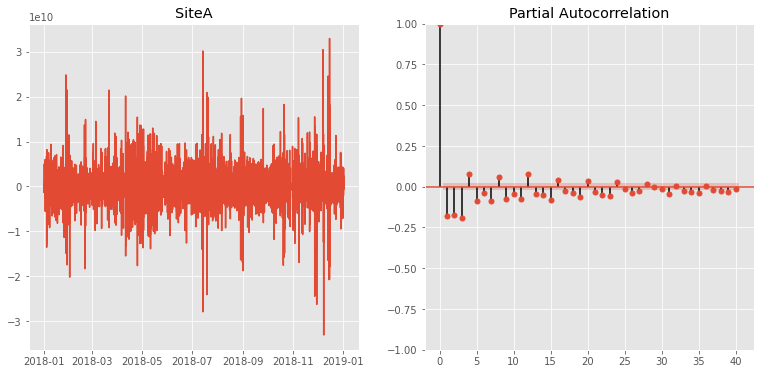

In [145]:
# from pacf plot we can see that data is ambiguous and can not identify the lag. so lets defferentiate to find lag frm pacf plot

siteA_df3 = df['SiteA'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.plot(siteA_df3)
ax1.set_title('SiteA')

plot_pacf(siteA_df, ax=ax2);

Still ambiguous but let consider the lag positive 4. So let's p=4